In [1]:
# TODO Tiffany - education and malnutrition
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

In [2]:
def init_data(csv):
    if "education" in csv:
        education = pd.read_csv(csv, skiprows = 4)
        return education
        # education.head()
    if "GDP" in csv:
        gdp = pd.read_csv(csv, skiprows = 4)
        return gdp
    if "malnutrition" in csv:
        malnutrition = pd.read_csv(csv, skiprows = 4)
        return malnutrition
    if "poverty" in csv:
        poverty = pd.read_csv(csv, skiprows = 4)
        return poverty
    if "swine" in csv:
        swine_flu = pd.read_csv(csv)
        return swine_flu
    # if "poverty" in csv:

In [14]:
# script_dir = os.path.dirname(__file__)
edu_full_path = os.path.expanduser('~/Desktop/Grad School/COMP 4447/Final Project/COMP-4447-Final-Project/data/world_bank_data/education.csv')
education = init_data(edu_full_path)
education["Country"] = education["Country Name"]
education = education.drop(["Country Name"], axis = 1).reindex()
education.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Country
0,ABW,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.570641,101.180557,NaN,NaN,NaN,NaN,NaN,NaN,Aruba
1,AFE,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa Eastern and Southern
2,AFG,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.495041,84.414948,85.625328,84.330589,NaN,Afghanistan
3,AFW,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa Western and Central
4,AGO,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angola


In [4]:
swine_full_path = os.path.expanduser('~/Desktop/Grad School/COMP 4447/Final Project/COMP-4447-Final-Project/data/swine_flu/swine_flu_data.csv')
swine = init_data(swine_full_path)
#sort
swine = swine.sort_values(by = "Country")
swine.head()

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths,Link
2110,2009-07-01,Algeria,2,0,https://www.who.int/csr/don/2009_07_01a/en/
2355,2009-07-06,Algeria,5,0,https://www.who.int/csr/don/2009_07_06/en/
1994,2009-06-29,Algeria,2,0,https://www.who.int/csr/don/2009_06_29/en/
1882,2009-06-26,Algeria,2,0,https://www.who.int/csr/don/2009_06_26/en/
1774,2009-06-24,Algeria,2,0,https://www.who.int/csr/don/2009_06_24/en/


In [5]:
#drop the link column
swine = swine.drop(["Link"], axis = 1)
swine.head()

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths
2110,2009-07-01,Algeria,2,0
2355,2009-07-06,Algeria,5,0
1994,2009-06-29,Algeria,2,0
1882,2009-06-26,Algeria,2,0
1774,2009-06-24,Algeria,2,0


In [6]:
swine["Percent of Deaths"] = swine["Cumulative no. of deaths"]/swine["Cumulative no. of cases"]
swine = swine.groupby(["Country"]).sum().reset_index()
swine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   148 non-null    object 
 1   Cumulative no. of cases   148 non-null    int64  
 2   Cumulative no. of deaths  148 non-null    int64  
 3   Percent of Deaths         148 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.8+ KB


In [31]:
#List of countries
cc = []
for i in swine["Country"]:
    if i not in cc:
        cc.append(i)
    else:
        continue
# cc


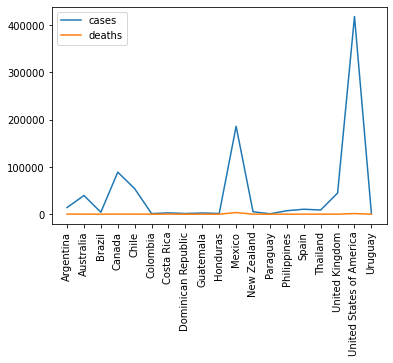

In [7]:
#plot countries
cases = []
deaths = []
country = []

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        cases.append(swine["Cumulative no. of cases"][i])
        deaths.append(swine["Cumulative no. of deaths"][i])

plt.xticks(rotation = 90)
plt.plot(country, cases)
plt.plot(country, deaths)
plt.legend(["cases", "deaths"])
plt.show()

#plot countries
plt.plot(swine["Country"], swine["Percent of Deaths"])

In [8]:
swine_edu = swine.merge(education, on = "Country", how = 'left')
swine_edu = swine_edu.fillna(0)


In [9]:
swine_edu.head(1)

,Country,Cumulative no. of cases,Cumulative no. of deaths,Percent of Deaths,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Algeria,19,0,0.0,DZA,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,0.0,0.0,0.0,...,97.636299,101.552879,106.031677,108.391579,105.546722,105.59005,105.636711,105.143959,101.364632,103.663528


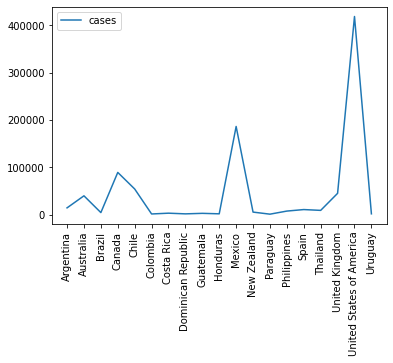

In [10]:
#plot cases
cases = []
country = []

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        cases.append(swine["Cumulative no. of cases"][i])

plt.xticks(rotation = 90)
plt.plot(country, cases)
plt.legend(["cases"])
plt.show()

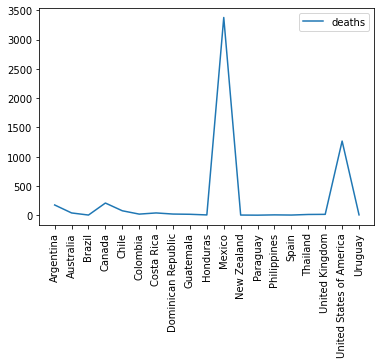

In [16]:
#plot deaths
deaths = []
country = []

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        deaths.append(swine["Cumulative no. of deaths"][i])

plt.xticks(rotation = 90)
plt.plot(country, deaths)
plt.legend(["deaths"])
plt.show()

In [25]:
#plot education
education.head()
#List of countries
cc = []
for i in education["Country"]:
    if i not in country:
        cc.append(i)
    else:
        continue
cc
cc_to_edu = {"United States":"United States of America"}

#replace pov countries with corrected IFS countries
education['Country'] = education['Country'].replace(cc_to_edu)
# for i in range(0, len(education["Country"])):
#     if swine["Cumulative no. of deaths"][i] > 0:
#         # print('nope')
#         country.append(swine["Country"][i])
#         deaths.append(swine["Cumulative no. of deaths"][i])

# plt.xticks(rotation = 90)
# plt.plot(country, deaths)
# plt.legend(["deaths"])
# plt.show()

In [29]:
drop = []
for idx, coun in enumerate(education["Country"]):
    if coun not in country:
        drop.append(idx)
    else:
        continue
print(drop)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 42, 43, 44, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 2

In [38]:
keep = set(range(education.shape[0])) - set(drop)
sliced = education.take(list(keep))
sliced = sliced.fillna(0)

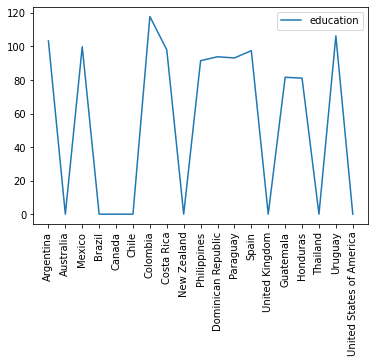

In [39]:
plt.xticks(rotation = 90)
plt.plot(list(sliced["Country"]), list(sliced["2009"]))
plt.legend(["education"])
plt.show()